In [35]:

import pandas as pd
import matplotlib.pyplot as  plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix
import seaborn as sns
#from textstat.textstat import *
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
import neattext as nt
import neattext.functions as nfx
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [37]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [39]:
tweet = df['tweet']

0. HATE SPEECH
1. OFFENSIVE LANGUAGE 
2. NEITHER

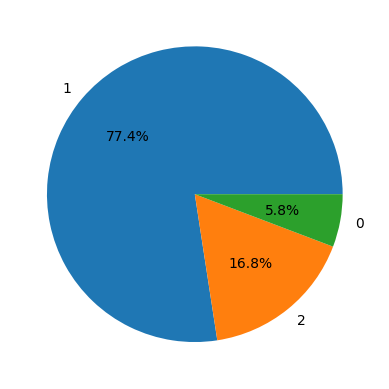

In [40]:

plt.pie(df['class'].value_counts().values,
        labels = df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

TEXT PREPROCESSING

In [41]:
df['tweet'] = df['tweet'].str.lower()
 
# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


In [42]:

def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:

            # Let's Lemmatize the word as well
            # before appending to the imp_words list.

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


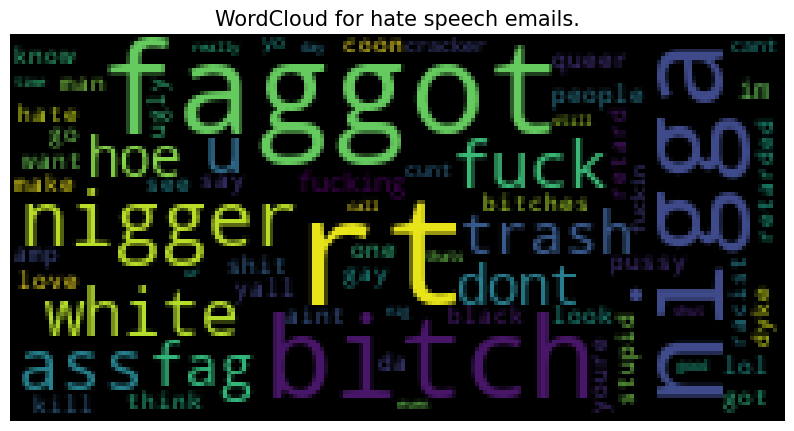

In [43]:

def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
   
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(df[df['class']==0], typ='hate speech')

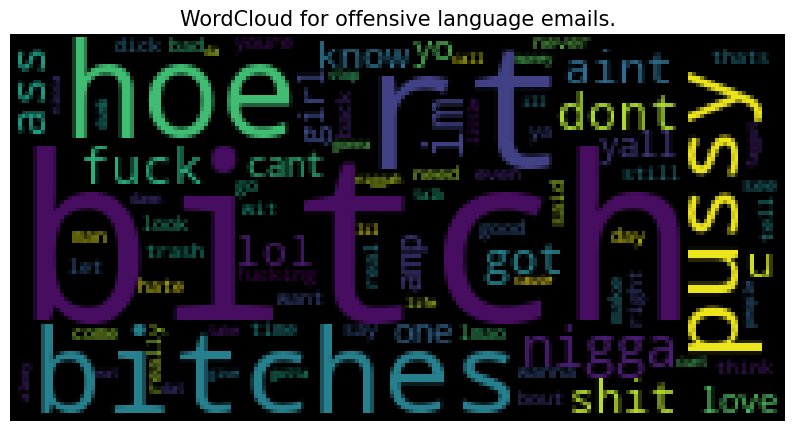

In [44]:

def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
   
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(df[df['class']==1], typ='offensive language')

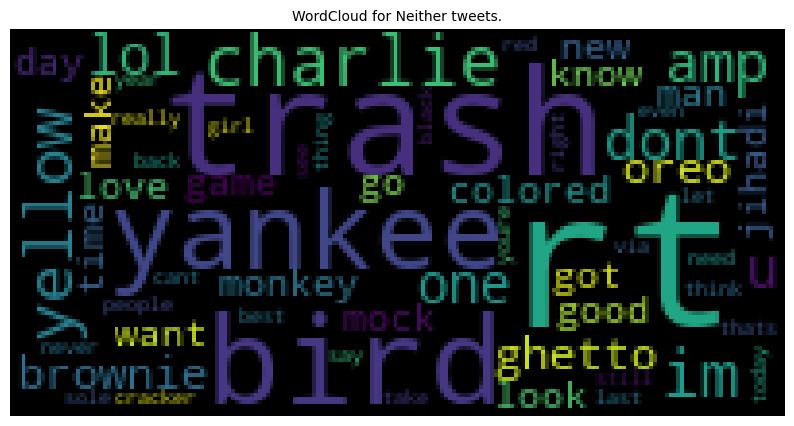

In [45]:

def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])
 
  plt.figure(figsize = (10,10))
   
  # Forming the word cloud
  wc = WordCloud(max_words = 200,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
   
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} tweets.', fontsize = 10)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()
 
plot_word_cloud(df[df['class']==2], typ='Neither')

In [46]:
df['label'] = df['class'].map({0:"hate speech detected" , 1:"offensive speech" , 2:"Nor hatred nor offensive "})
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...,Nor hatred nor offensive
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,offensive speech
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,offensive speech
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny,offensive speech
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,offensive speech


In [47]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=4300)
class_0 = df[df['class'] == 0]
 
balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)
print("data balanced")

data balanced


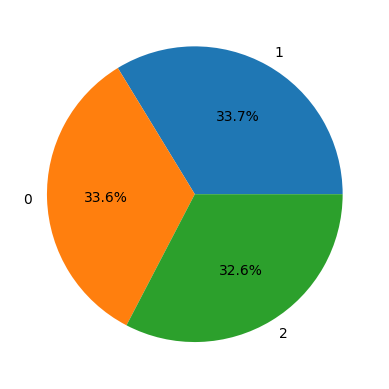

In [48]:
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [49]:

features = balanced_df['tweet']
target = balanced_df['class']
 
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((10202,), (2551,))

In [50]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((10202, 3), (2551, 3))

In [51]:

max_words = 5000
max_len = 100
 
token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')
 
token.fit_on_texts(X_train)

In [52]:
max_words = 5000
token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')
token.fit_on_texts(X_train)
 
#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                             maxlen=50,
                             padding='post',
                             truncating='post')
 
Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

In [53]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['tweet'] )
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 199694 stored elements and shape (24783, 7474)>

In [54]:
X = tfidf
y = df['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.59      0.12      0.20       164
           1       0.90      0.97      0.93      1905
           2       0.84      0.81      0.83       410

    accuracy                           0.88      2479
   macro avg       0.78      0.63      0.65      2479
weighted avg       0.87      0.88      0.87      2479

Logistic Regression, Accuracy Score: 0.8846308995562727


In [55]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.10      0.34      0.16       290
           1       0.88      0.71      0.78      3832
           2       0.55      0.58      0.56       835

    accuracy                           0.67      4957
   macro avg       0.51      0.54      0.50      4957
weighted avg       0.78      0.67      0.71      4957

Naive Bayes, Accuracy Score: 0.6655235021182166


In [56]:
x= np.array(df['tweet'])
y = np.array(df['label'])
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train , x_test , y_train , y_test = train_test_split(x , y  , test_size=0.33 , random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
y_preds = clf.predict(x_test)
acc4 = accuracy_score(y_test , y_preds)
print(acc4)

0.8729673554224233


In [23]:

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

                           precision    recall  f1-score   support

Nor hatred nor offensive        0.82      0.82      0.82       835
     hate speech detected       0.53      0.13      0.21       290
         offensive speech       0.91      0.96      0.93      3832

                 accuracy                           0.89      4957
                macro avg       0.75      0.64      0.66      4957
             weighted avg       0.87      0.89      0.87      4957

Random Forest, Accuracy Score: 0.8890457938269114


In [57]:

x= np.array(df['tweet'])
y = np.array(df['label'])
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, x_test , y_train , y_test = train_test_split(x , y  , test_size=0.33 , random_state=42)
model = CatBoostClassifier()

# Fit the model
model.fit(X_train, y_train)
# Predict on the test set
y_preds = model.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_preds))

Learning rate set to 0.091318
0:	learn: 1.0057448	total: 159ms	remaining: 2m 39s
1:	learn: 0.9244560	total: 307ms	remaining: 2m 32s
2:	learn: 0.8540554	total: 462ms	remaining: 2m 33s
3:	learn: 0.8073389	total: 590ms	remaining: 2m 26s
4:	learn: 0.7603759	total: 733ms	remaining: 2m 25s
5:	learn: 0.7238705	total: 884ms	remaining: 2m 26s
6:	learn: 0.6945606	total: 1.04s	remaining: 2m 27s
7:	learn: 0.6678928	total: 1.19s	remaining: 2m 27s
8:	learn: 0.6371019	total: 1.34s	remaining: 2m 27s
9:	learn: 0.6179681	total: 1.43s	remaining: 2m 21s
10:	learn: 0.5995697	total: 1.59s	remaining: 2m 22s
11:	learn: 0.5779075	total: 1.73s	remaining: 2m 22s
12:	learn: 0.5581550	total: 1.89s	remaining: 2m 23s
13:	learn: 0.5426051	total: 2.04s	remaining: 2m 23s
14:	learn: 0.5301431	total: 2.19s	remaining: 2m 23s
15:	learn: 0.5177982	total: 2.34s	remaining: 2m 23s
16:	learn: 0.5093195	total: 2.48s	remaining: 2m 23s
17:	learn: 0.5021605	total: 2.62s	remaining: 2m 22s
18:	learn: 0.4950883	total: 2.77s	remaining:

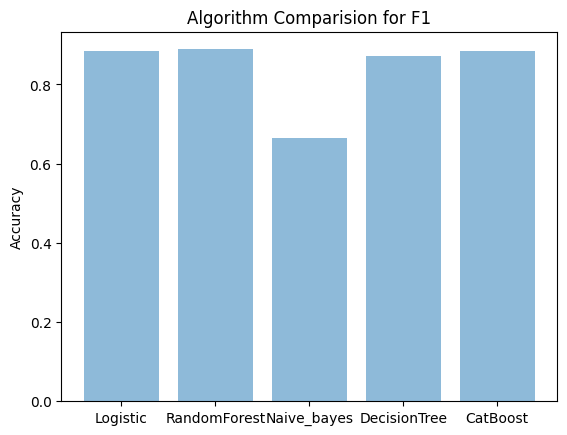

In [58]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'DecisionTree','CatBoost')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2 , acc4,accuracy]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

In [60]:
from playsound import playsound
 
# for playing note.wav file
playsound('synthesize (2).wav')
playsound('synthesize (1).wav')
import speech_recognition as s_r
print(s_r.__version__) # just to print the version not required
r = s_r.Recognizer()
my_mic = s_r.Microphone(device_index=1) 
with my_mic as source:
    print("Say now!!!!")
    r.adjust_for_ambient_noise(source) #reduce noise
    audio = r.listen(source) #take voice input from the microphone
speech = r.recognize_google(audio)
print(speech) #to print voice into text

df = cv.transform([speech]).toarray()
print(clf.predict(df))


3.11.0
Say now!!!!
I will kill you I will kill you I will kill you I will kill you I will kill you
['hate speech detected']


In [61]:
test_data="good boy"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))


['Nor hatred nor offensive ']


In [62]:
import pickle
model_path = "clf.pkl"
vectorizer_path = "cv.pkl"

with open(model_path, "wb") as model_file:
    pickle.dump(clf, model_file)

with open(vectorizer_path, "wb") as vectorizer_file:
    pickle.dump(cv, vectorizer_file)

print(f"Model and vectorizer saved to {model_path} and {vectorizer_path}.")

Model and vectorizer saved to clf.pkl and cv.pkl.


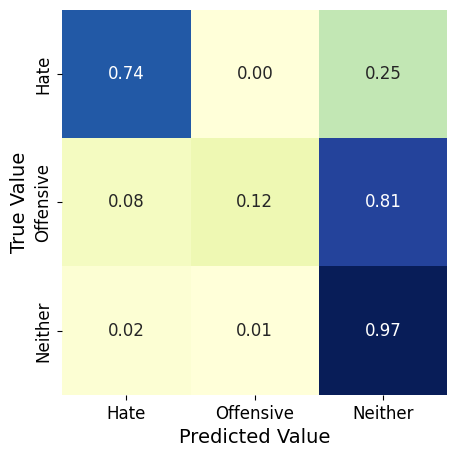

In [63]:
#Confusion Matrix for TFIDF with additional features 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

THROUGH LSTM

In [24]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32,input_length = max_len),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [25]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)



In [26]:
# Instantiate Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences for uniform length
from tensorflow.keras.utils import pad_sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len)

# Now use X_train_padded and X_val_padded in your model.fit()
history = model.fit(X_train_padded, Y_train,
                    validation_data=(X_val_padded, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])


Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6730 - loss: 3.7103 - val_accuracy: 0.5480 - val_loss: 0.9608 - learning_rate: 0.0010
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9027 - loss: 0.3760 - val_accuracy: 0.8401 - val_loss: 0.5006 - learning_rate: 0.0010
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9406 - loss: 0.2532 - val_accuracy: 0.8577 - val_loss: 0.4749 - learning_rate: 0.0010
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9531 - loss: 0.2032 - val_accuracy: 0.8746 - val_loss: 0.4895 - learning_rate: 0.0010
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - accuracy: 0.9647 - loss: 0.1686 - val_accuracy: 0.8526 - val_loss: 0.5714 - learning_rate: 0.0010
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9726 - loss: 0.1261 - val_accuracy: 0.8953 - val_loss: 0.4379 - learning_rate: 5.0000e-04
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9834

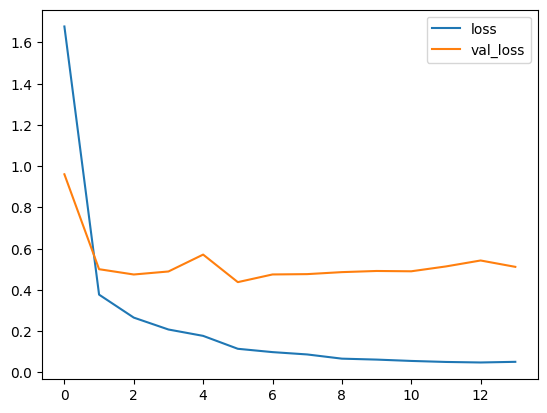

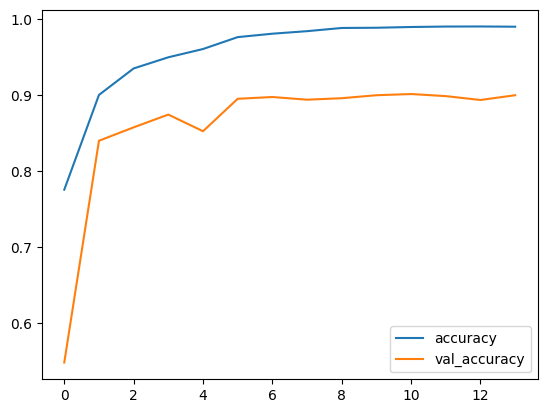

In [27]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


Social media sentiment USING FUZZY LOGIC AND VADER

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_ta

              precision    recall  f1-score   support

    negative       0.77      0.31      0.44       134
     neutral       0.54      0.84      0.66       200
    positive       0.76      0.60      0.67       165

    accuracy                           0.62       499
   macro avg       0.69      0.58      0.59       499
weighted avg       0.67      0.62      0.60       499



C:\Users\Hardik\AppData\Local\Temp\ipykernel_132220\3087314947.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuzzy_sentiment_score'].fillna(0.5, inplace=True)
c:\Users\Hardik\AppData\Local\Programs\Python\Python312\Scripts\all_packages\00000000\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


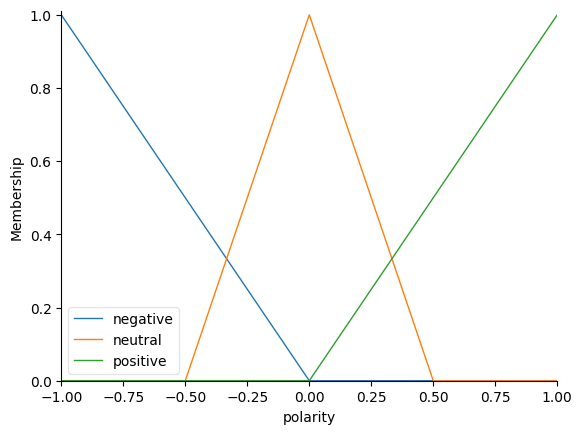

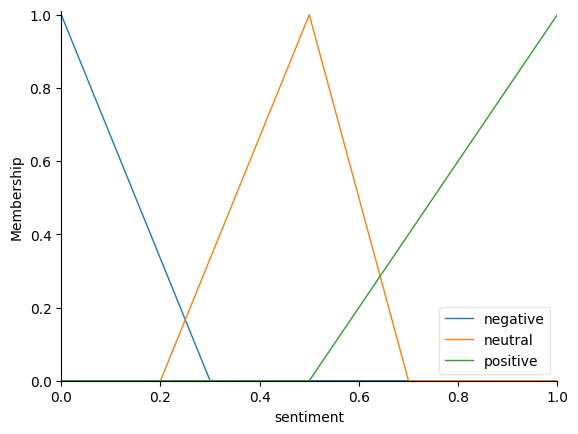

In [35]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')

# Preprocessing function to clean the text data
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Read the dataset
df = pd.read_csv('sentiment_analysis-(2).csv')

# Apply text preprocessing

df['processed_text'] = df['text'].apply(preprocess)


# Calculate sentiment polarity using TextBlob
df['textblob_polarity'] = df['text'].apply(lambda text: 
TextBlob(text).sentiment.polarity)

# Define fuzzy logic variables
polarity = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'polarity')
sentiment = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'sentiment')

# Membership functions for polarity
polarity['negative'] = fuzz.trimf(polarity.universe, [-1, -1, 0])
polarity['neutral'] = fuzz.trimf(polarity.universe, [-0.5, 0, 0.5])
polarity['positive'] = fuzz.trimf(polarity.universe, [0, 1, 1])

# Membership functions for sentiment
sentiment['negative'] = fuzz.trimf(sentiment.universe, [0, 0, 0.3])
sentiment['neutral'] = fuzz.trimf(sentiment.universe, [0.2, 0.5, 0.7])
sentiment['positive'] = fuzz.trimf(sentiment.universe, [0.5, 1, 1])

# Define fuzzy logic rules
rule1 = ctrl.Rule(polarity['positive'], sentiment['positive'])
rule2 = ctrl.Rule(polarity['negative'], sentiment['negative'])
rule3 = ctrl.Rule(polarity['neutral'], sentiment['neutral'])

# Control system setup
sentiment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sentiment_sim = ctrl.ControlSystemSimulation(sentiment_ctrl)

# Calculate fuzzy sentiment scores
fuzzy_sentiments = []
for polarity_score in df['textblob_polarity']:
    sentiment_sim.input['polarity'] = polarity_score
    try:
        sentiment_sim.compute()
        fuzzy_sentiments.append(sentiment_sim.output['sentiment'])
    except:
        fuzzy_sentiments.append(np.nan)  

# Add fuzzy sentiment scores to dataframe
df['fuzzy_sentiment_score'] = fuzzy_sentiments

# Handle missing values in fuzzy sentiment scores
df['fuzzy_sentiment_score'].fillna(0.5, inplace=True)

# Map fuzzy sentiment scores to sentiment labels
def map_sentiment(score):
    if score <= 0.4:
        return 'negative'
    elif score >= 0.6:
        return 'positive'
    else:
        return 'neutral'

df['fuzzy_sentiment'] = df['fuzzy_sentiment_score'].apply(map_sentiment)

# Print the classification report
report = classification_report(df['sentiment'], df['fuzzy_sentiment'], target_names=['negative', 'neutral', 'positive'])
print(report)

# Visualize fuzzy membership functions
polarity.view()
sentiment.view()


USING VADER

In [66]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	print("Overall sentiment dictionary is : ", sentiment_dict)
	print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
	print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
	print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

	print("Sentence Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		print("Positive")

	elif sentiment_dict['compound'] <= - 0.05 :
		print("Negative")

	else :
		print("Neutral")



# Driver code
if __name__ == "__main__" :

	print("\n1st statement :")
	sentence = " i hate poor people "

	# function calling
	sentiment_scores(sentence)

	print("\n2nd Statement :")
	sentence = "study is going on as usual"
	sentiment_scores(sentence)

	print("\n3rd Statement :")
	sentence = " i love you."
	sentiment_scores(sentence)



1st statement :
Overall sentiment dictionary is :  {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.7783}
sentence was rated as  77.3 % Negative
sentence was rated as  22.7 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

2nd Statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

3rd Statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  32.300000000000004 % Neutral
sentence was rated as  67.7 % Positive
Sentence Overall Rated As Positive
